In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("./../Bitstamp_BTCUSD_d.csv")

In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df.drop(['unix', 'symbol'], axis= 1)
df.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2024-01-18,42738.0,42748.0,42695.0,42722.0,0.450107,1.922946e+04
1,2024-01-17,43128.0,43187.0,42172.0,42738.0,1669.718057,7.136041e+07
2,2024-01-16,42483.0,43566.0,42056.0,43131.0,2368.790325,1.021683e+08
3,2024-01-15,41701.0,43324.0,41680.0,42493.0,1455.985255,6.186918e+07
4,2024-01-14,42834.0,43060.0,41704.0,41715.0,1256.256942,5.240476e+07


In [5]:
df = df.sort_values(by='date')
df = df.reset_index(drop=True)
df.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2014-11-28,363.59,381.34,360.57,376.28,3220878.18,8617.15
1,2014-11-29,376.42,386.60,372.25,376.72,2746157.05,7245.19
2,2014-11-30,376.57,381.99,373.32,373.34,1145566.61,3046.33
3,2014-12-01,376.40,382.31,373.03,378.39,2520662.37,6660.56
4,2014-12-02,378.39,382.86,375.23,379.25,2593576.46,6832.53


In [6]:
df['open'] = pd.to_numeric(df['open'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['close'] = pd.to_numeric(df['close'])
df['next_day_close'] = df['close'].shift(-1)
df = df.dropna()

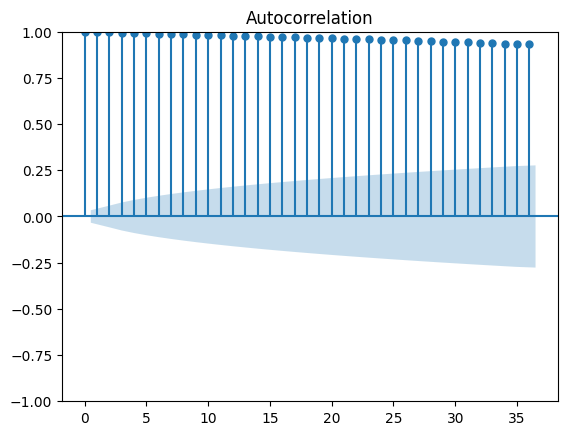

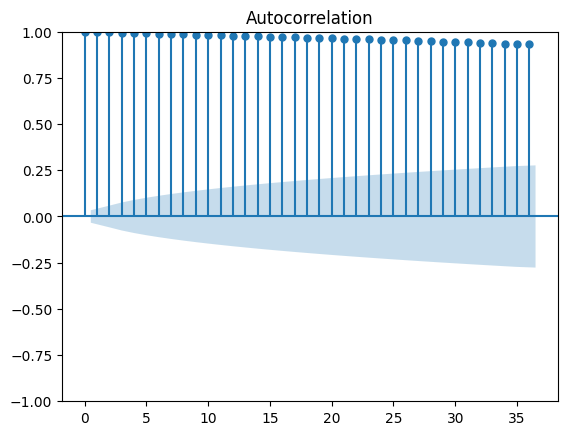

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['close'].values)

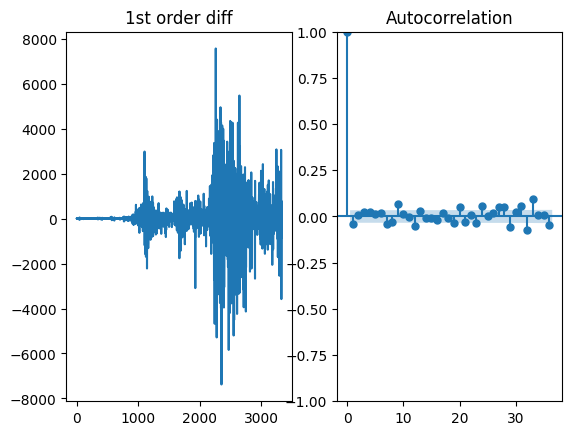

In [8]:
import matplotlib.pyplot as plt
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order diff')
ax1.plot(df.close.diff())
ax2 = f.add_subplot(122)
plot_acf(df.close.diff().dropna(), ax=ax2)
plt.show()

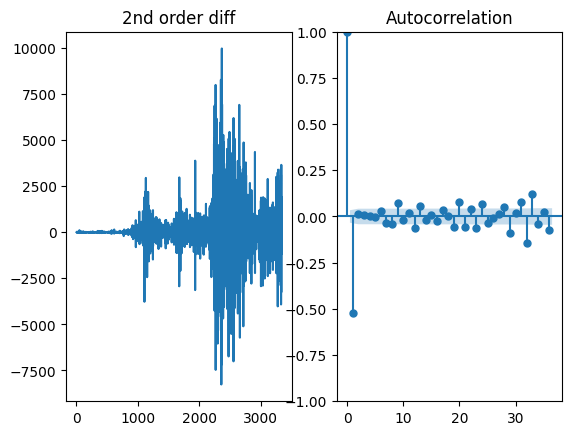

In [9]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd order diff')
ax1.plot(df.close.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.close.diff().diff().dropna(), ax=ax2)
plt.show()

In [13]:
df[['close']][len(df)-1000:]

,close
2338,51176.65
2339,50118.94
2340,49128.43
2341,54073.41
2342,55091.39
...,...
3333,42843.00
3334,41715.00
3335,42493.00
3336,43131.00


In [17]:
df = df[105:]

Root Mean Squared Error: 2025.4014865321835
MAPE: 0.04427004482710112
MAE: 1505.9930648500147
r2: 0.9710233725967137


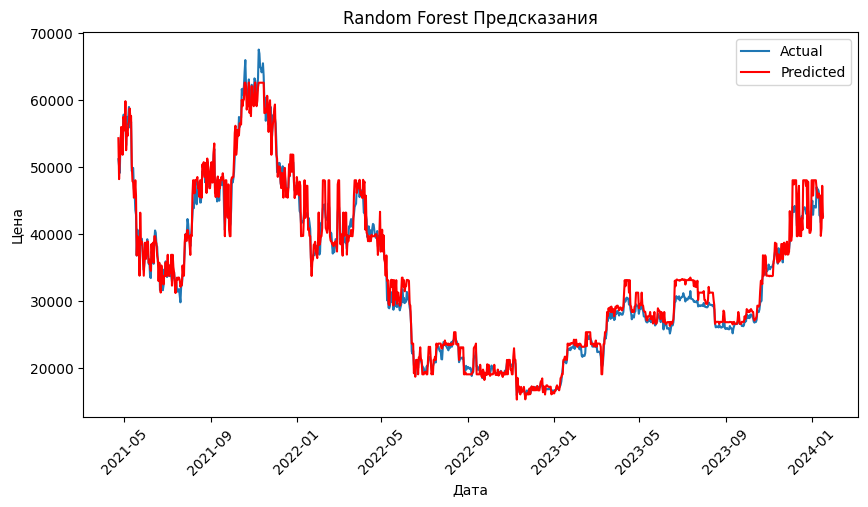

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Assuming df is your DataFrame with 'close' and 'next_day_close' columns

# Select features (X) and target variable (y)
X = df[['close']][:len(df)-1000]
y = df['next_day_close'][:len(df)-1000]
X_test = df[['close']][len(df)-1000:]
Y_test = df['next_day_close'][len(df)-1000:]
sh = df[len(df)-1000:]

# Split data into training and testing sets
# X_train, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

# Fit the model
rf_regressor.fit(X, y)

# Make predictions
predictions = rf_regressor.predict(X_test)

# Evaluate model
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
print("MAPE:", mean_absolute_percentage_error(Y_test, predictions))
print("MAE:", mean_absolute_error(Y_test, predictions))
print("r2:", r2_score(Y_test, predictions))
plt.figure(figsize=(10, 5))  

plt.plot(sh.date, X_test.close, label='Actual')
plt.plot(sh.date, predictions, color='red', label='Predicted')
# plt.xlabel('Date')
# plt.ylabel('Price')
plt.title('Random Forest Предсказания')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.xticks(rotation=45)
# plt.title('Random Forest Model Predictions')
plt.legend()
plt.show()


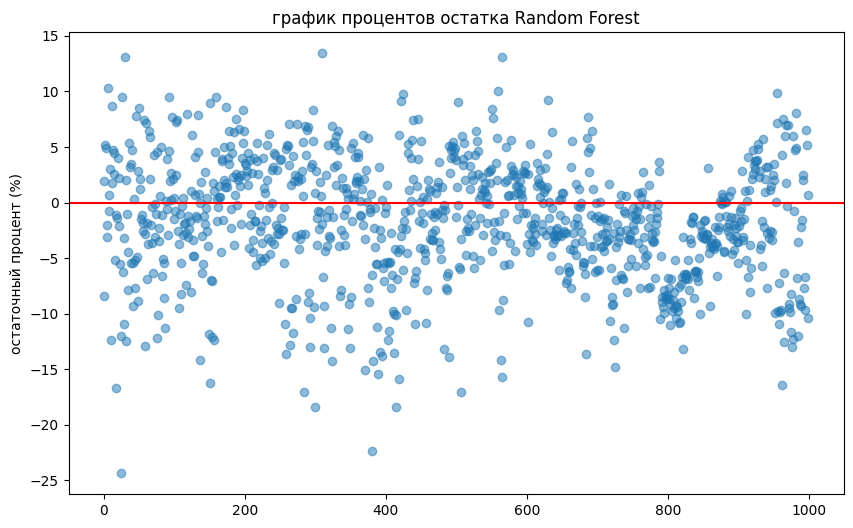

In [25]:
# Calculate percent residuals
percent_residuals = 100 * (Y_test - predictions) / Y_test

# Plot percent residuals
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(percent_residuals)), percent_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('график процентов остатка Random Forest')
plt.ylabel('остаточный процент (%)')
plt.show()


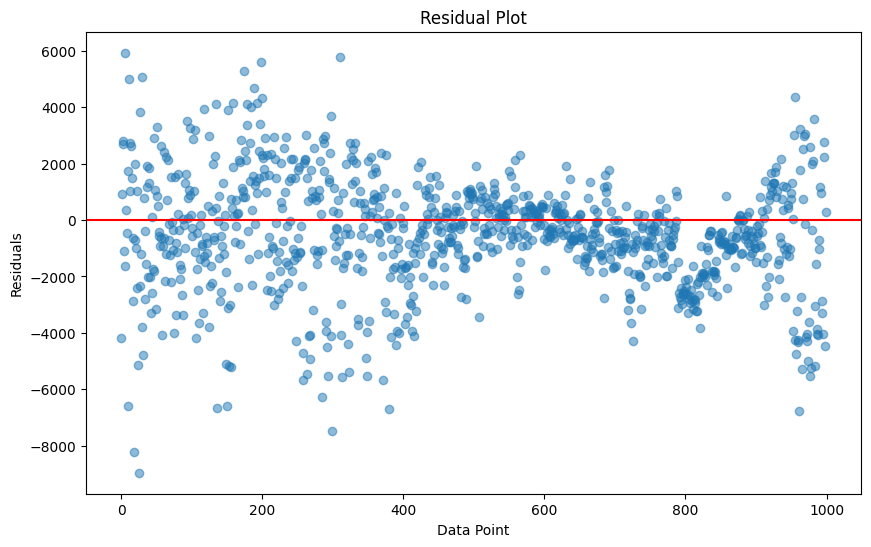

In [22]:
residuals = Y_test - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(residuals)), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Data Point')
plt.ylabel('Residuals')
plt.show()

In [22]:
df.head()

,date,open,high,low,close,Volume BTC,Volume USD,next_day_close
105,2015-03-13,295.56,295.84,282.99,284.40,2654225.31,9178.74,282.70
106,2015-03-14,284.40,287.69,280.46,282.70,1595106.71,5616.62,286.40
107,2015-03-15,282.70,287.75,281.42,286.40,691987.13,2426.65,289.70
108,2015-03-16,286.40,294.26,285.78,289.70,1882414.82,6473.86,284.46
109,2015-03-17,289.70,292.99,281.90,284.46,1864637.80,6470.43,257.29


Root Mean Squared Error: 1952.884434394492
MAPE: 0.04801697563284027
MAE: 1519.3200287111833
r2: 0.9730611733663105


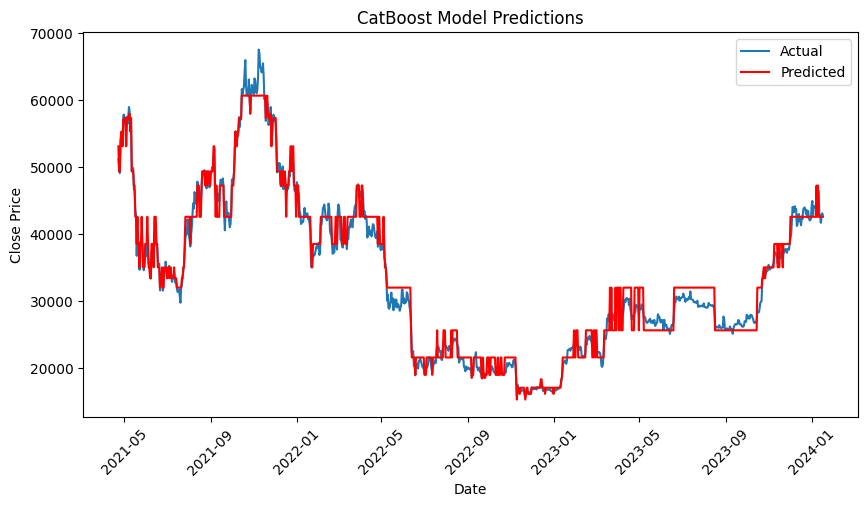

In [20]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with 'close' and 'next_day_close' columns

# Select features (X) and target variable (y)
X = df[['close']][:len(df)-1000]
y = df['next_day_close'][:len(df)-1000]
X_test = df[['close']][len(df)-1000:]
Y_test = df['next_day_close'][len(df)-1000:]
sh = df[len(df)-1000:]

# Initialize CatBoost regressor
catboost_regressor = CatBoostRegressor(iterations=200, random_state=42, logging_level='Silent')

# Fit the model
catboost_regressor.fit(X, y)

# Make predictions
predictions = catboost_regressor.predict(X_test)

# Evaluate model
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
print("MAPE:", mean_absolute_percentage_error(Y_test, predictions))
print("MAE:", mean_absolute_error(Y_test, predictions))
print("r2:", r2_score(Y_test, predictions))
plt.figure(figsize=(10, 5))  

# Plotting with Matplotlib
plt.plot(sh.date, X_test.close, label='Actual')
plt.plot(sh.date, predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('CatBoost Model Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Root Mean Squared Error: 1921.3118738788073
MAE: 1440.4090468751463
MAPE: 0.042973318314002085
r2: 0.9739251798766887


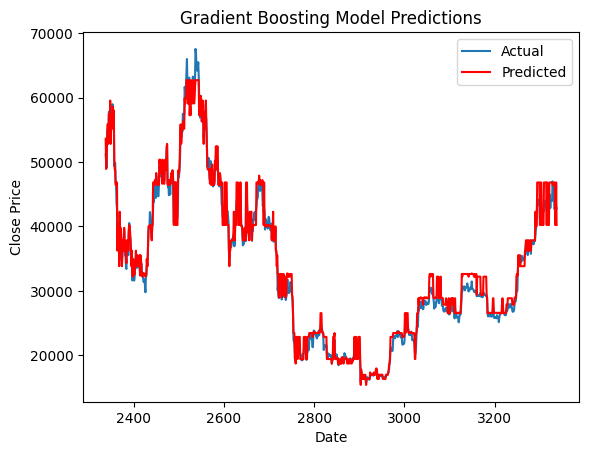

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with 'close' and 'next_day_close' columns

# Select features (X) and target variable (y)
X = df[['close']][:len(df)-1000]
y = df['next_day_close'][:len(df)-1000]
X_test = df[['close']][len(df)-1000:]
Y_test = df['next_day_close'][len(df)-1000:]

# Initialize Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gb_regressor.fit(X, y)

# Make predictions
predictions = gb_regressor.predict(X_test)

# Evaluate model
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
print("MAE:", mean_absolute_error(Y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(Y_test, predictions))
print("r2:", r2_score(Y_test, predictions))

# Plotting with Matplotlib
plt.plot(X_test.index, X_test.close, label='Actual')
plt.plot(X_test.index, predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Gradient Boosting Model Predictions')
plt.legend()
plt.show()


Root Mean Squared Error: 1987.251004591787
MAE: 1189.3208765536258
MAPE: 0.03201642181270306
r2: 0.9721046998933175


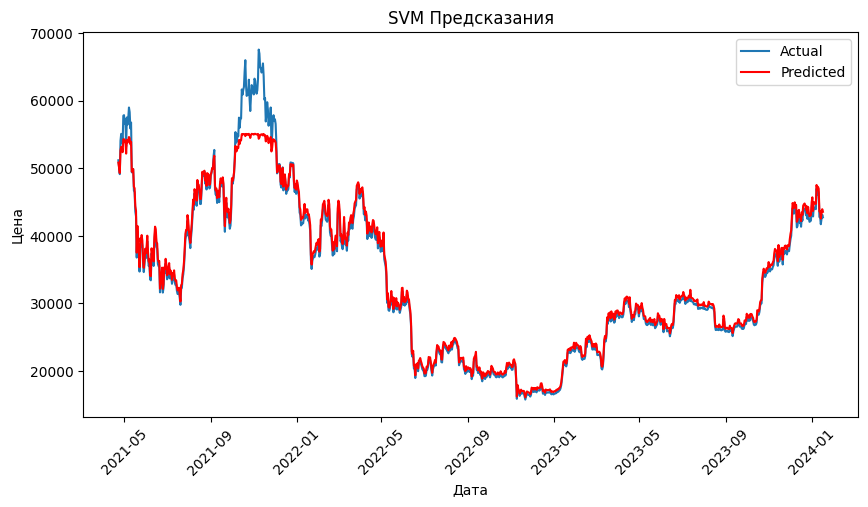

In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df is your DataFrame with 'close' and 'next_day_close' columns

# Select features (X) and target variable (y)
X = df[['close']][:len(df)-1000]
y = df['next_day_close'][:len(df)-1000]
X_test = df[['close']][len(df)-1000:]
Y_test = df['next_day_close'][len(df)-1000:]

# Initialize Gradient Boosting regressor
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Fit the model
svr.fit(X_train_scaled, y)


# Make predictions
predictions = svr.predict(X_test_scaled)
# predictions = scaler.inverse_transform(predictio)
plt.figure(figsize=(10, 5))  

# Evaluate model
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
print("MAE:", mean_absolute_error(Y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(Y_test, predictions))
print("r2:", r2_score(Y_test, predictions))

# Plotting with Matplotlib
plt.plot(sh.date, X_test.close, label='Actual')
plt.plot(sh.date, predictions, color='red', label='Predicted')
plt.title('SVM Предсказания')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xticks(rotation=45)
plt.legend()
plt.show()


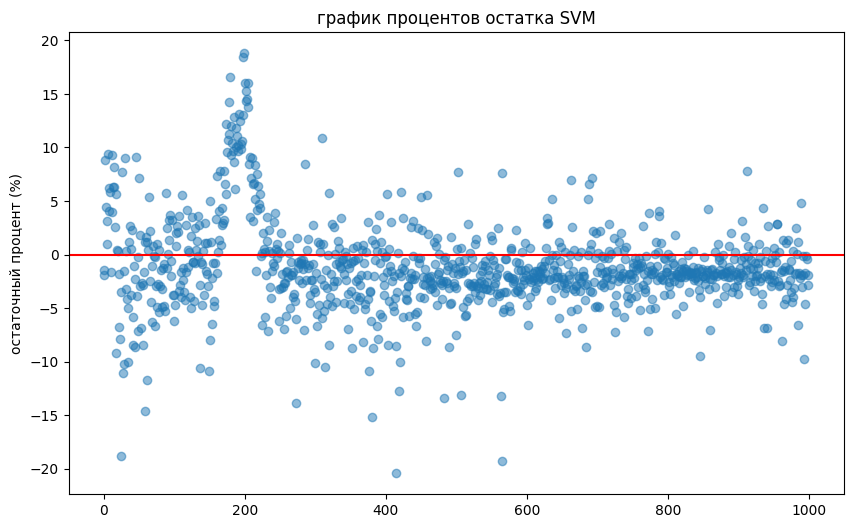

In [28]:
# Calculate percent residuals
percent_residuals = 100 * (Y_test - predictions) / Y_test

# Plot percent residuals
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(percent_residuals)), percent_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('график процентов остатка SVM')
plt.ylabel('остаточный процент (%)')
plt.show()
